# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Movies Reviews Classification

Welcome to my Capstone Project **Movies Reviews Classification** which is a **classification problem**. I will use sentiment analysis in analyzing movies reviews. A lot of people can’t decide which movie to watch. The trivial solution to decide, is to search manually for any website which provides reviews for every movie. Absolutely, with growing up the number of websites which provide these reviews, the mission to search and decide become more complex.

Here machine learning play an important role to facilitate the difficult task to decide which movie you should watch. Sentiment analysis uses machine learning to analyze the reviews of people for many movies. So any one can find an overall positive or negative feedback of the movie. So, it reduces the time to decide which movie to watch.

I will build a model using **Naive Bayes** that tries to classify the reviews into 1/positive or 0/negative. I will try to take the advantage of labeled data and use supervised learning algorithm to predict the sentiment of the reviews. I will compare the accuracy of Naive Bayes with diiferent Classifiers.


-----
## Reading Data

The dataset for this project originates from the Kaggle competition **Bag of Words Meets Bags of Popcorn**. The competition was based on using machine learning in sentiment analysis.

The training set exists in tab-delimited and has 25,000 rows containing an id, sentiment, and text for each review. There is another file that is tab-delimited file and has a header row followed by 25,000 rows containing an id and text only. We will predict the sentiment.
- **ID:** integer represent the key of every row in the dataset.
- **Sentiment:** it the label of film reviews. It has Binary value which be 0 for negative or 1 for positive.
- **review:** it contains the reviews of every movie which we will use to train and build the model.

I will separate the data into into features and the labels: The first is review which will be the feature of the movies. And the another one for the sentiment which will be the sentiment_labels.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


# Load the IMDB movie reviews dataset
data = pd.read_csv('DataSet\labeledTrainData.tsv', sep='\t')

precleaned_review_features = data['review'].values

sentiment_labels = data['sentiment'].values

# Success
print("IMDB dataset has {} data points with {} variables each.".format(*data.shape))
data.head(10)

IMDB dataset has 25000 data points with 3 variables each.


,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


-----
## Data Preprocessing and Cleaning
In this section of this project, my goal is to clean the reviews text and remove useless words from the text.
I will clean the reviews data by removing HTML tags from the texts (reviews). Also, we will remove punctuation, numbers, stop words and small words. These steps are done using NLTK and regular expressions.

Firstly, import the required libraries and define the special characters which i don't care with them.

In [2]:
import re
from nltk.corpus import stopwords
from collections import Counter
from nltk.stem.snowball import SnowballStemmer

special_characters = re.compile("[^A-Za-z]+")

Here, I convert all the reviews characters into lowercase characters. Then, remove all non alphabetic characters with space using the special character array.

In [3]:
def clean_text_reviews(review):
    review = review.lower()
    clean_text = re.sub(special_characters, " ", review)
    return clean_text

I used NLTK to get the set of English stop words. It searched for every word in the review. if not exist, i will push it to the review again.

In [4]:
def remove_stop_words(review):
    stop_words = set(stopwords.words("english"))
    review = review.split()
    words = [word for word in review if not word in stop_words]
    #append the word at the end of the text
    review = " ".join(words)
    return review

Stemming is the basic text processing method for English text. The goal of stemming is to reduce inflectional forms and sometimes derivationally related forms of a word to a common base form.
So, stemming  is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form - generally- a written word form. We here dealing only with English reviews, so i used the stemmer of English word

In [5]:
def stemmig(review):
    stemmer_Words = SnowballStemmer("english")
    review = review.split()
    words = [stemmer_Words.stem(word) for word in review]
    review = " ".join(words)
    return review

Here, I remove small words which size is less than 2 characters. They will be useless in the reviews.

In [6]:
def remove_small_words(review):
    review = review.split()
    words = [word for word in review if len(word) > 2]
    review = " ".join(words)
    return review

Call the previous function in order for every review feature in the pecleaned review features. It will produce cleaned review text and will append all these text in cleaned review features. Cleaned_review_features will have all the reviews text [25000 reviews] after cleaning.

In [7]:
cleaned_review_features = []
for review in precleaned_review_features:
    cleaned_review = clean_text_reviews(review)
    cleaned_review = remove_stop_words(cleaned_review)
    cleaned_review = stemmig(cleaned_review)
    cleaned_review = remove_small_words(cleaned_review)
    cleaned_review_features.append(cleaned_review)

In [8]:
print "Length of cleaned reviews" ,len(cleaned_review_features)

Length of cleaned reviews 25000


----

## Developing the Model
In this section of the project, I will develop the tools and techniques necessary for a model to make a prediction and Testing. Also, Build different models and calculate the accuracy for all of them.

### Shuffle and Split Data
This is the first step. I will Shuffle and split all data into Training and Testing Data with ration 80:20 respectively. Also, import the needed libraries to complete the modeling and predicting

In [9]:
#importing required libraries to develop and test the models
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc

import matplotlib.pyplot as plt

# shuffle and split the cleaned data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(cleaned_review_features, sentiment_labels,
                                                    test_size=0.20, train_size=0.80, random_state =1)

C:\Users\Kaboud\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Creating Features from a Bag of Words
I will convert the reviews text to some kind of numeric representation for machine learning by Bag of Words. It models each document by counting the number of times each word appears.

In [10]:
vectorizer = CountVectorizer()
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

### Building and Testing Different Models
I will try to build different models like Naive Bayes, SVM, Logistic Regression and Dicision Tree. After Building, i will calculate the accuracy of prediction of each one by Computing Area Under the Receiver Operating Characteristic Curve (ROC AUC).

Build **Multinomial Naive Bayes** Classifier and compute its accuracy with ROC

In [11]:
nb = MultinomialNB(alpha = 1.6)
nb.fit(train_features, y_train)
predictions = nb.predict(test_features)
acc = roc_auc_score(y_test, predictions)
print "Multinomial Naive Bayes :", acc*100

Multinomial Naive Bayes : 86.13851603946311


Build **Support Vector Machine** Classifier and compute its accuracy with ROC

In [13]:
SVM = SVC()
SVM.fit(train_features, y_train)
predictions = SVM.predict(test_features)
acc = roc_auc_score(y_test, predictions)
print "Support Vector Machine :", acc*100

Support Vector Machine : 74.57714739109224


Build **Logistic Regression** Classifier and compute its accuracy with ROC

In [14]:
clr = LogisticRegression(C=0.031)
clr.fit(train_features, y_train)
predictions = clr.predict(test_features)
acc = roc_auc_score(y_test, predictions)
print "Logistic Regression :", acc*100

Logistic Regression : 88.00041472059722


Build **Desision Tree** Classifier and compute its accuracy with ROC

In [15]:
dtc = DecisionTreeClassifier()
dtc.fit(train_features, y_train)
predictions = dtc.predict(test_features)
acc = roc_auc_score(y_test, predictions)
print "Decision Tree Classifier :", acc*100

Decision Tree Classifier : 71.0183982664935


----
## Conclusion
From the previous accuracy, we found that Logistic Regression is the best accuracy and build its model in a little time. So, I tried to draw the learning curve for it. This learning curve is the result of building Logistic Regression Model with AUC-ROC metric and number of Folds in cross validation = 10.

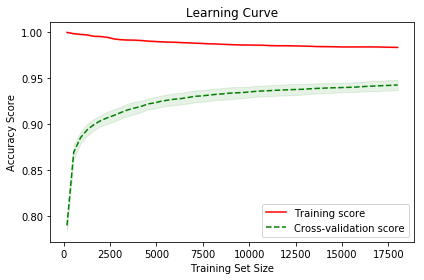

In [17]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(C=0.031), 
                                                        train_features,
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='roc_auc',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '-', color="r",  label="Training score")
plt.plot(train_sizes, test_mean,'--', color="g", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

The Best classifiers in prediction accuracy are Logistic Regression and Naive Bayes. They gave an accuracy more than 85% after computing Area Under the Receiver Operating Characteristic Curve (ROC AUC). SVM and DT consume alot of time to build its model.